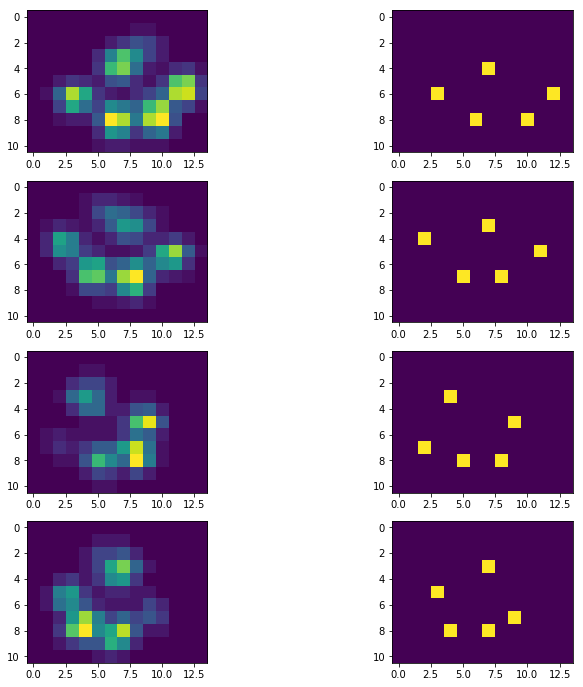

In [53]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import seaborn as sns
import matplotlib.pyplot as plt


#for some reason I had to reshape. Numpy ignored the shape header.
paws_data = np.loadtxt("paws.txt").reshape(4,11,14)

#getting a list of images
paws = [p.squeeze() for p in np.vsplit(paws_data,4)]


def detect_peaks(image):
    """
    Takes an image and detect the peaks usingthe local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    neighborhood = generate_binary_structure(2,2)

    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.

    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background

    return detected_peaks


#applying the detection and plotting results
plt.figure(figsize=(12, 12))
for i, paw in enumerate(paws):
    detected_peaks = detect_peaks(paw)
    plt.subplot(4,2,(2*i+1))
    plt.imshow(paw)
    plt.subplot(4,2,(2*i+2) )
    plt.imshow(detected_peaks)

plt.show()

In [36]:
neighborhood = generate_binary_structure(2,2)
print(neighborhood.shape)
print(neighborhood)

(3, 3)
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


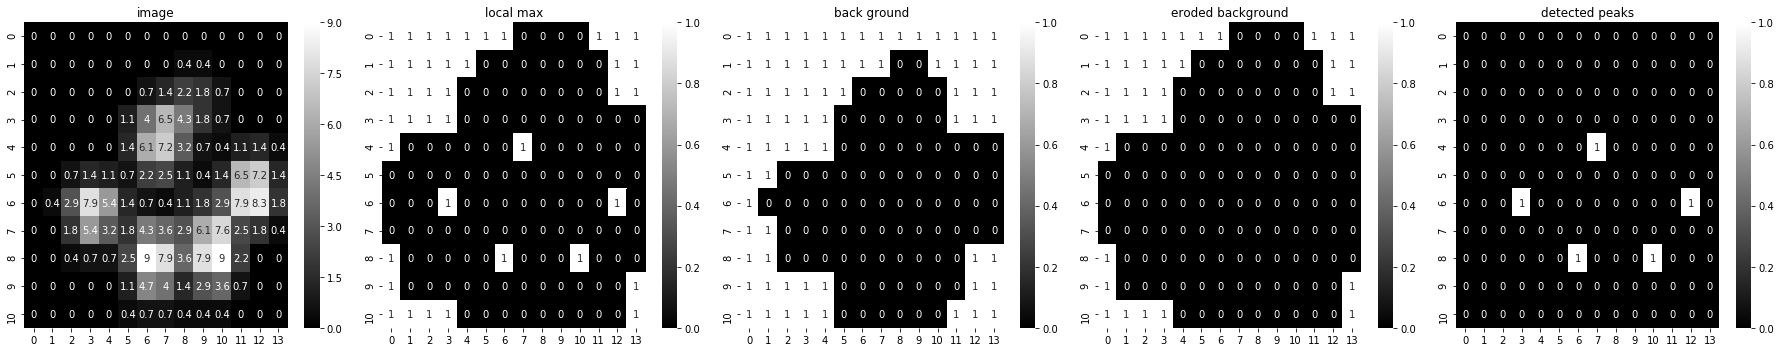

In [70]:
paws_data = np.loadtxt("paws.txt").reshape(4,11,14)

#getting a list of images
paws = [p.squeeze() for p in np.vsplit(paws_data,4)]

image = paws[0]

neighborhood = generate_binary_structure(2,2)

#apply the local maximum filter; all pixel of maximal value 
#in their neighborhood are set to 1
local_max = maximum_filter(image, footprint=neighborhood)==image
#local_max is a mask that contains the peaks we are 
#looking for, but also the background.
#In order to isolate the peaks we must remove the background from the mask.
#we create the mask of the background
background = (image==0)
#a little technicality: we must erode the background in order to 
#successfully subtract it form local_max, otherwise a line will 
#appear along the background border (artifact of the local maximum filter)
eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)
#we obtain the final mask, containing only peaks, 
#by removing the background from the local_max mask (xor operation)
detected_peaks = local_max ^ eroded_background

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
sns.heatmap(image, cmap='gray', annot=True, ax = axes[0])
sns.heatmap(local_max, cmap='gray', annot=True, ax = axes[1])
sns.heatmap(background, cmap='gray', annot=True, ax = axes[2])
sns.heatmap(eroded_background, cmap='gray', annot=True, ax = axes[3])
sns.heatmap(detected_peaks, cmap='gray', annot=True, ax = axes[4])
axes[0].set_title('image')
axes[1].set_title('local max')
axes[2].set_title('back ground')
axes[3].set_title('eroded background')
axes[4].set_title('detected peaks')
fig.tight_layout()

In [39]:
detected_peaks

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False,  True, False, False, False, False, False,
        False, False, False,  True, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False,  True, False, False,
        F

In [42]:
print(image)

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.4 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.7 1.4 2.2 1.8 0.7 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.1 4.  6.5 4.3 1.8 0.7 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.4 6.1 7.2 3.2 0.7 0.4 1.1 1.4 0.4]
 [0.  0.  0.7 1.4 1.1 0.7 2.2 2.5 1.1 0.4 1.4 6.5 7.2 1.4]
 [0.  0.4 2.9 7.9 5.4 1.4 0.7 0.4 1.1 1.8 2.9 7.9 8.3 1.8]
 [0.  0.  1.8 5.4 3.2 1.8 4.3 3.6 2.9 6.1 7.6 2.5 1.8 0.4]
 [0.  0.  0.4 0.7 0.7 2.5 9.  7.9 3.6 7.9 9.  2.2 0.  0. ]
 [0.  0.  0.  0.  0.  1.1 4.7 4.  1.4 2.9 3.6 0.7 0.  0. ]
 [0.  0.  0.  0.  0.  0.4 0.7 0.7 0.4 0.4 0.4 0.  0.  0. ]]


In [45]:
print(maximum_filter(image, size=3))

[[0.  0.  0.  0.  0.  0.  0.  0.4 0.4 0.4 0.4 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.7 1.4 2.2 2.2 2.2 1.8 0.7 0.  0. ]
 [0.  0.  0.  0.  1.1 4.  6.5 6.5 6.5 4.3 1.8 0.7 0.  0. ]
 [0.  0.  0.  0.  1.4 6.1 7.2 7.2 7.2 4.3 1.8 1.4 1.4 1.4]
 [0.  0.7 1.4 1.4 1.4 6.1 7.2 7.2 7.2 4.3 6.5 7.2 7.2 7.2]
 [0.4 2.9 7.9 7.9 7.9 6.1 7.2 7.2 7.2 3.2 7.9 8.3 8.3 8.3]
 [0.4 2.9 7.9 7.9 7.9 5.4 4.3 4.3 6.1 7.6 7.9 8.3 8.3 8.3]
 [0.4 2.9 7.9 7.9 7.9 9.  9.  9.  7.9 9.  9.  9.  8.3 8.3]
 [0.  1.8 5.4 5.4 5.4 9.  9.  9.  7.9 9.  9.  9.  2.5 1.8]
 [0.  0.4 0.7 0.7 2.5 9.  9.  9.  7.9 9.  9.  9.  2.2 0. ]
 [0.  0.  0.  0.  1.1 4.7 4.7 4.7 4.  3.6 3.6 3.6 0.7 0. ]]


In [46]:
print(maximum_filter(image, footprint=neighborhood))

[[0.  0.  0.  0.  0.  0.  0.  0.4 0.4 0.4 0.4 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.7 1.4 2.2 2.2 2.2 1.8 0.7 0.  0. ]
 [0.  0.  0.  0.  1.1 4.  6.5 6.5 6.5 4.3 1.8 0.7 0.  0. ]
 [0.  0.  0.  0.  1.4 6.1 7.2 7.2 7.2 4.3 1.8 1.4 1.4 1.4]
 [0.  0.7 1.4 1.4 1.4 6.1 7.2 7.2 7.2 4.3 6.5 7.2 7.2 7.2]
 [0.4 2.9 7.9 7.9 7.9 6.1 7.2 7.2 7.2 3.2 7.9 8.3 8.3 8.3]
 [0.4 2.9 7.9 7.9 7.9 5.4 4.3 4.3 6.1 7.6 7.9 8.3 8.3 8.3]
 [0.4 2.9 7.9 7.9 7.9 9.  9.  9.  7.9 9.  9.  9.  8.3 8.3]
 [0.  1.8 5.4 5.4 5.4 9.  9.  9.  7.9 9.  9.  9.  2.5 1.8]
 [0.  0.4 0.7 0.7 2.5 9.  9.  9.  7.9 9.  9.  9.  2.2 0. ]
 [0.  0.  0.  0.  1.1 4.7 4.7 4.7 4.  3.6 3.6 3.6 0.7 0. ]]


In [43]:
print(maximum_filter(image, footprint=neighborhood)==image)

[[ True  True  True  True  True  True  True False False False False  True
   True  True]
 [ True  True  True  True  True False False False False False False False
   True  True]
 [ True  True  True  True False False False False False False False False
   True  True]
 [ True  True  True  True False False False False False False False False
  False False]
 [ True False False False False False False  True False False False False
  False False]
 [False False False False False False False False False False False False
  False False]
 [False False False  True False False False False False False False False
   True False]
 [False False False False False False False False False False False False
  False False]
 [ True False False False False False  True False False False  True False
  False False]
 [ True False False False False False False False False False False False
  False  True]
 [ True  True  True  True False False False False False False False False
  False  True]]


In [49]:
background = (image==0)
print(background)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True]
 [ True  True  True  True  True  True  True  True False False  True  True
   True  True]
 [ True  True  True  True  True  True False False False False False  True
   True  True]
 [ True  True  True  True  True False False False False False False  True
   True  True]
 [ True  True  True  True  True False False False False False False False
  False False]
 [ True  True False False False False False False False False False False
  False False]
 [ True False False False False False False False False False False False
  False False]
 [ True  True False False False False False False False False False False
  False False]
 [ True  True False False False False False False False False False False
   True  True]
 [ True  True  True  True  True False False False False False False False
   True  True]
 [ True  True  True  True  True False False False False False False  True
   True  True]]


In [47]:
binary_erosion(background, structure=neighborhood, border_value=1)

array([[ True,  True,  True,  True,  True,  True,  True, False, False,
        False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False, False, False,  True,  True],
       [ True,  True,  True,  True, False, False, False, False, False,
        False, False, False,  True,  True],
       [ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        F